# Problem Statement

The objective of the case study is to predict the number of food orders.
You are hired by a restaurent chain and you need to estimate the order frequency across a range of different categories for restuarants in varied locations and with consumers having different consumption techniques. This study will help the chain to make decisions for opening new restaurants.
  
We have a data of 4000 restaurant orders across the Delhi, Noida and Gurgaon. Based on this data build linear regression model and perform supervised learning techniques- Ridge & Lasso and compare the outcomes.


Our Dataset has following variables:



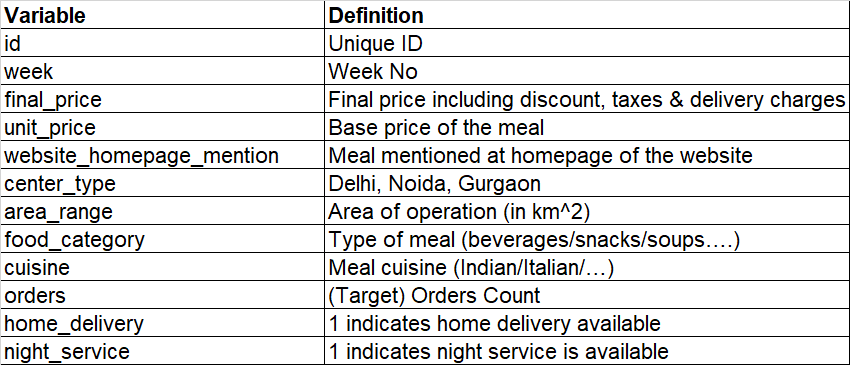

### Upload Required Libraries

In [0]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

### Importing data

In [0]:
## Load the xlsx file available in the working or specified directory
#os.chdir('C:\\GL Class\DSBA - Python\Predictive Modeling\Week 1')
df = pd.read_excel("food.xlsx")

### EDA

In [0]:
# Check top few records to get a feel of the data structure
df.head()

,id,week,final_price,unit_price,website_homepage_mention,food_category,cuisine,center_type,home_delivery,night_service,area_range,orders
0,2102001,122.0,150.35,152.35,0.0,Beverages,Italian,Delhi,1.0,1,7.0,972
1,2102002,95.0,484.03,485.03,0.0,Desert,Indian,Noida,0.0,1,5.6,150
2,2102003,52.0,281.33,281.33,0.0,Starters,Italian,Gurgaon,0.0,1,3.0,55
3,2102004,10.0,167.81,196.94,0.0,Extras,Italian,Delhi,1.0,1,4.0,256
4,2102005,122.0,212.46,256.14,0.0,Salad,Italian,Delhi,0.0,1,3.4,82



#### Shape

In [0]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  4000 
no. of columns:  12


#### Dropping "id" as it different for every row and will be a noise for while building models

In [0]:
df.id.nunique()

4000

drop the id column as it is useless for the model

In [0]:
df = df.drop('id', axis=1)

In [0]:
df.head()

,week,final_price,unit_price,website_homepage_mention,food_category,cuisine,center_type,home_delivery,night_service,area_range,orders
0,122.0,150.35,152.35,0.0,Beverages,Italian,Delhi,1.0,1,7.0,972
1,95.0,484.03,485.03,0.0,Desert,Indian,Noida,0.0,1,5.6,150
2,52.0,281.33,281.33,0.0,Starters,Italian,Gurgaon,0.0,1,3.0,55
3,10.0,167.81,196.94,0.0,Extras,Italian,Delhi,1.0,1,4.0,256
4,122.0,212.46,256.14,0.0,Salad,Italian,Delhi,0.0,1,3.4,82


#### Data type of data features

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
week                        3981 non-null float64
final_price                 3987 non-null float64
unit_price                  4000 non-null float64
website_homepage_mention    3980 non-null float64
food_category               3980 non-null object
cuisine                     4000 non-null object
center_type                 3960 non-null object
home_delivery               3960 non-null float64
night_service               4000 non-null int64
area_range                  3976 non-null float64
orders                      4000 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 343.9+ KB


#### checking for Possible columns which are categorical but are not having data type "object"

In [0]:
df['website_homepage_mention'].value_counts()

0.0    3643
1.0     337
Name: website_homepage_mention, dtype: int64

In [0]:
df['home_delivery'].value_counts()

0.0    2356
1.0    1604
Name: home_delivery, dtype: int64

In [0]:
df['night_service'].value_counts()

0    2007
1    1993
Name: night_service, dtype: int64

Change the data types of these 3 features 

In [0]:
cat=["website_homepage_mention","home_delivery","night_service"]

In [0]:
for i in cat:
    df[i]=df[i].astype("object")

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
week                        3981 non-null float64
final_price                 3987 non-null float64
unit_price                  4000 non-null float64
website_homepage_mention    3980 non-null object
food_category               3980 non-null object
cuisine                     4000 non-null object
center_type                 3960 non-null object
home_delivery               3960 non-null object
night_service               4000 non-null object
area_range                  3976 non-null float64
orders                      4000 non-null int64
dtypes: float64(4), int64(1), object(6)
memory usage: 343.9+ KB


#### Making different list for categorical columns and numerical columns


In [0]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

    

['website_homepage_mention', 'food_category', 'cuisine', 'center_type', 'home_delivery', 'night_service']
['week', 'final_price', 'unit_price', 'area_range', 'orders']


#### Describe for numerical and categorical columns

In [0]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
week,3981.0,74.818890,41.949720,1.00,38.00,76.00,111.00,145.00
final_price,3987.0,335.602666,152.638684,76.69,232.83,304.64,445.23,767.33
unit_price,4000.0,357.496720,160.348496,92.15,243.50,313.31,466.63,767.33
area_range,3976.0,4.107897,1.096252,0.90,3.60,4.00,4.50,7.00
orders,4000.0,257.090250,414.932322,13.00,54.00,135.00,312.00,12489.00


In [0]:
df[cat].describe().T

,count,unique,top,freq
website_homepage_mention,3980,2,0,3643
food_category,3980,14,Beverages,1131
cuisine,4000,3,Italian,2064
center_type,3960,3,Delhi,2269
home_delivery,3960,2,0,2356
night_service,4000,2,0,2007


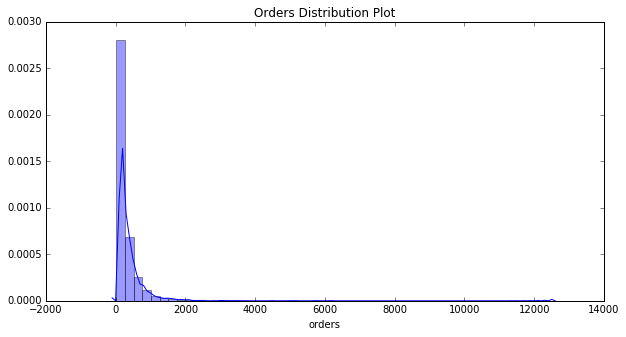

In [0]:
#Visualizing the distribution of orders
plt.figure(figsize=(10,5))

plt.title('Orders Distribution Plot')
sns.distplot(df['orders'])
plt.show()

* Dependent variable orders is showing right skewed distribution

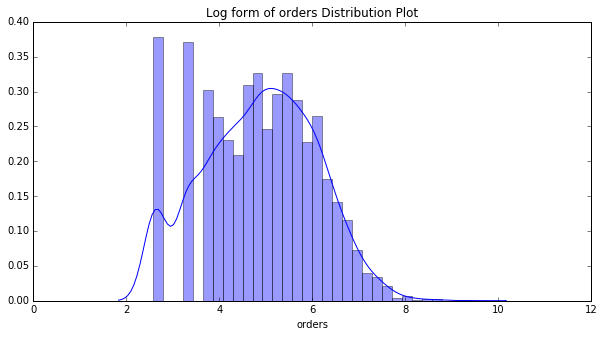

In [0]:
#Visualizing the distribution of orders
plt.figure(figsize=(10,5))

plt.title('Log form of orders Distribution Plot')
sns.distplot(np.log(df['orders']))
plt.show()

**log of orders addresses skewness in distribution 

### unique values for categorical variables

In [0]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

WEBSITE_HOMEPAGE_MENTION :  2
1.0     337
0.0    3643
Name: website_homepage_mention, dtype: int64


FOOD_CATEGORY :  14
Fish              96
Extras           105
Soup             112
Biryani          194
Seafood          228
Salad            241
Pasta            246
Starters         255
Other Snacks     261
Desert           269
Sandwich         270
Rice Bowl        277
Pizza            295
Beverages       1131
Name: food_category, dtype: int64


CUISINE :  3
Continental     931
Indian         1005
Italian        2064
Name: cuisine, dtype: int64


CENTER_TYPE :  3
Noida       845
Gurgaon     846
Delhi      2269
Name: center_type, dtype: int64


HOME_DELIVERY :  2
1.0    1604
0.0    2356
Name: home_delivery, dtype: int64


NIGHT_SERVICE :  2
1    1993
0    2007
Name: night_service, dtype: int64




#### Fish & Seafood belongs to same category

In [0]:
df['food_category'] = df['food_category'].replace({'Fish': 'Seafood'})

In [0]:
df['food_category'].value_counts()

Beverages       1131
Seafood          324
Pizza            295
Rice Bowl        277
Sandwich         270
Desert           269
Other Snacks     261
Starters         255
Pasta            246
Salad            241
Biryani          194
Soup             112
Extras           105
Name: food_category, dtype: int64

### Checking Orders Vs Weekly  to see if there is any pattern and if there is a need to derive some new features  from Weekly.

In [0]:
Df_week = df.sort_values(by = 'orders', ascending = False)
Df_week = Df_week.head(20)

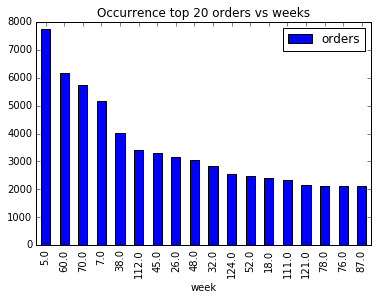

In [0]:
df_weekly = pd.DataFrame(Df_week.groupby(['week'])['orders'].mean().sort_values(ascending = False))
df_weekly.plot.bar()
plt.title('Occurrence top 20 orders vs weeks')
plt.show()

There doesn't seem to be any regularity 

In [0]:
# Are there any missing values ?
df.isnull().sum()

week                        19
final_price                 13
unit_price                   0
website_homepage_mention    20
food_category               20
cuisine                      0
center_type                 40
home_delivery               40
night_service                0
area_range                  24
orders                       0
dtype: int64

In [0]:
## Are there any duplicate records

# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,week,final_price,unit_price,website_homepage_mention,food_category,cuisine,center_type,home_delivery,night_service,area_range,orders


## Imputation of all missing values with the bext possible option

In [0]:
df.week.mode()

0    35.0
dtype: float64

In [0]:
df.week=df.week.fillna(35.0)

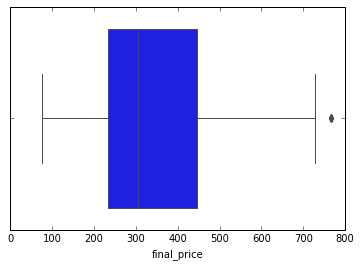

In [0]:
sns.boxplot(df.final_price)

#### since small amount of possible outliers are present here, we will use median to impute null values.


In [0]:
df.final_price.median()

304.64

In [0]:
df[df.final_price.isnull()]

,week,final_price,unit_price,website_homepage_mention,food_category,cuisine,center_type,home_delivery,night_service,area_range,orders
169,35.0,NaN,465.63,0,Beverages,Continental,Delhi,0,1,3.9,26
377,35.0,NaN,94.12,0,Beverages,Italian,Noida,1,1,4.0,447
1111,35.0,NaN,149.38,0,Beverages,Italian,Delhi,1,0,4.5,1216
1461,35.0,NaN,280.33,0,Starters,Italian,Delhi,0,1,3.8,68
1789,35.0,NaN,290.03,0,Starters,Italian,Gurgaon,0,1,2.7,28
2057,35.0,NaN,485.03,0,Biryani,Indian,Delhi,0,1,4.8,13
2150,35.0,NaN,292.03,0,Other Snacks,Italian,Gurgaon,0,1,3.6,27
2466,35.0,NaN,608.19,0,Seafood,Continental,Delhi,0,1,3.5,69
2485,35.0,NaN,180.42,0,Beverages,Italian,Delhi,1,1,3.6,796
2598,35.0,NaN,306.58,0,Rice Bowl,Indian,Noida,1,0,4.1,499


#### Hurray!! we found a pattern here. In the above output, we saw all final_price (nan values) have same week number thats why we will impute the null value by the median of final_price for only week number=35

In [0]:
df[df.week==35.0]["final_price"].median()

280.33

In [0]:
df.final_price=df.final_price.fillna(280.33)

In [0]:
df.website_homepage_mention.mode()

0    0
dtype: object

In [0]:
df.website_homepage_mention=df.website_homepage_mention.fillna(0.0)

In [0]:
df.food_category.mode()

0    Beverages
dtype: object

In [0]:
df.food_category=df.food_category.fillna("Beverages")

In [0]:
df.center_type.mode()

0    Delhi
dtype: object

In [0]:
df.center_type=df.center_type.fillna("Delhi")

In [0]:
df.home_delivery.mode()

0    0
dtype: object

In [0]:
df.home_delivery=df.home_delivery.fillna(0.0)

In [0]:
df.area_range.mode()

0    4.0
dtype: float64

In [0]:
df.area_range=df.area_range.fillna(4.0)

In [0]:
df.isnull().sum()

week                        0
final_price                 0
unit_price                  0
website_homepage_mention    0
food_category               0
cuisine                     0
center_type                 0
home_delivery               0
night_service               0
area_range                  0
orders                      0
dtype: int64

### Univariate Analysis

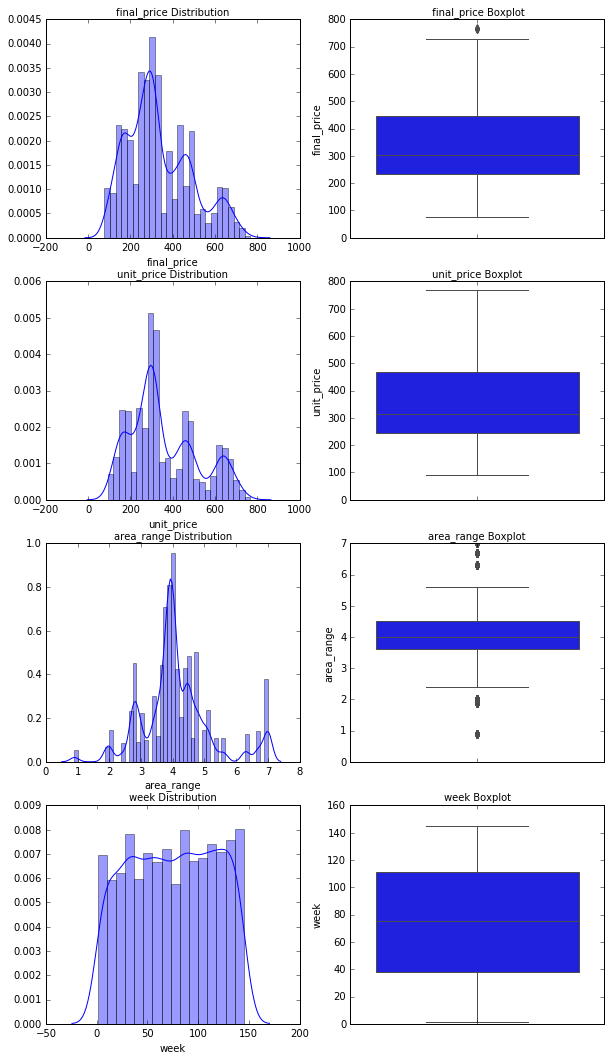

In [0]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['final_price'] , ax=axes[0][0])
a.set_title("final_price Distribution",fontsize=10)

a = sns.boxplot(df['final_price'] , orient = "v" , ax=axes[0][1])
a.set_title(" final_price Boxplot",fontsize=10)

a = sns.distplot(df['unit_price'] , ax=axes[1][0])
a.set_title("unit_price Distribution",fontsize=10)

a = sns.boxplot(df['unit_price'] , orient = "v" , ax=axes[1][1])
a.set_title("unit_price Boxplot",fontsize=10)


a = sns.distplot(df['area_range'] , ax=axes[2][0])
a.set_title("area_range Distribution",fontsize=10)

a = sns.boxplot(df['area_range'] , orient = "v" , ax=axes[2][1])
a.set_title("area_range Boxplot",fontsize=10)


a = sns.distplot(df['week'] , ax=axes[3][0])
a.set_title("week Distribution",fontsize=10)

a = sns.boxplot(df['week'] , orient = "v" , ax=axes[3][1])
a.set_title("week Boxplot",fontsize=10)

plt.show()

There are some possible outliers and the same would be treated accordingly

###  Bivariate and Multivariate Analysis

In [0]:
print(cat)

['website_homepage_mention', 'food_category', 'cuisine', 'center_type', 'home_delivery', 'night_service']


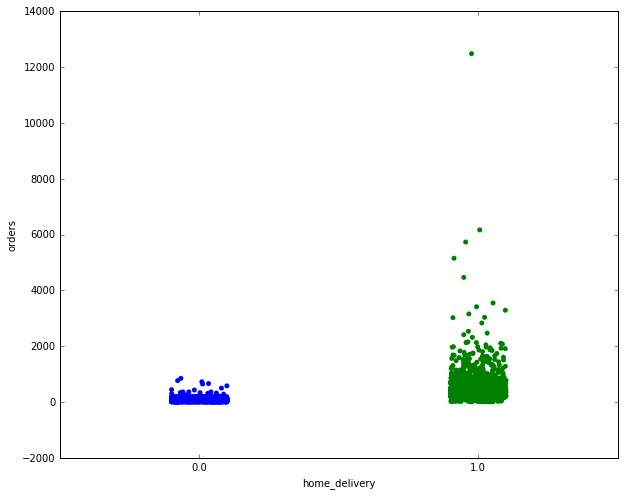

In [0]:
plt.figure(figsize=(10,8))
sns.stripplot(df["home_delivery"], df['orders'], jitter=True) 
plt.show()

It is clear here that Home_delivery is necessary to have bigger orders... we can see the difference how restaurants
having home delivery option are having way much orders then the ones who do not provide home delivery.

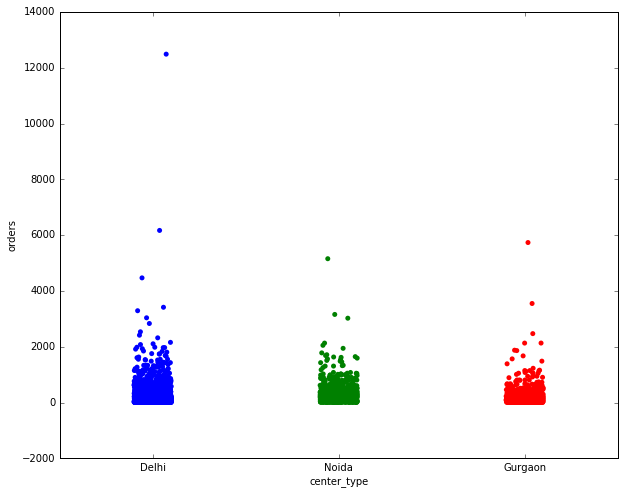

In [0]:
plt.figure(figsize=(10,8))
sns.stripplot(df["center_type"], df['orders'], jitter=True) ### Distribution of values
plt.show()

 Clearly highest amount of orders are coming from delhi...again an important factor based on location if looking to 
 open a new restaurant.

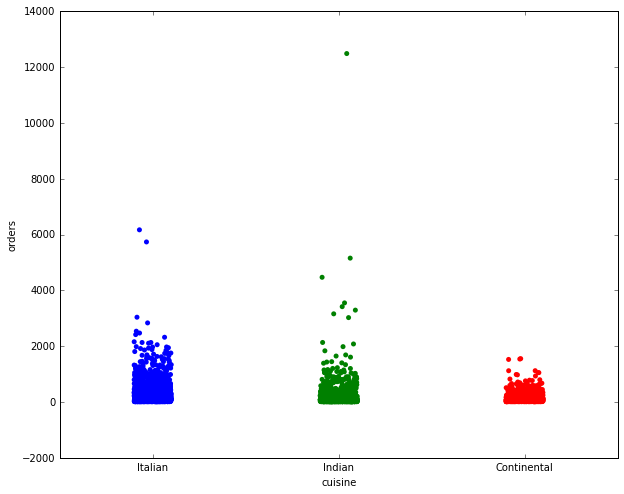

In [0]:
plt.figure(figsize=(10,8))
sns.stripplot(df["cuisine"], df['orders'], jitter=True) ### Distribution of values
plt.show()

 Highest amount of orders are coming from italian cuisine .. which cuisine to focus on to have more orders.. a must have

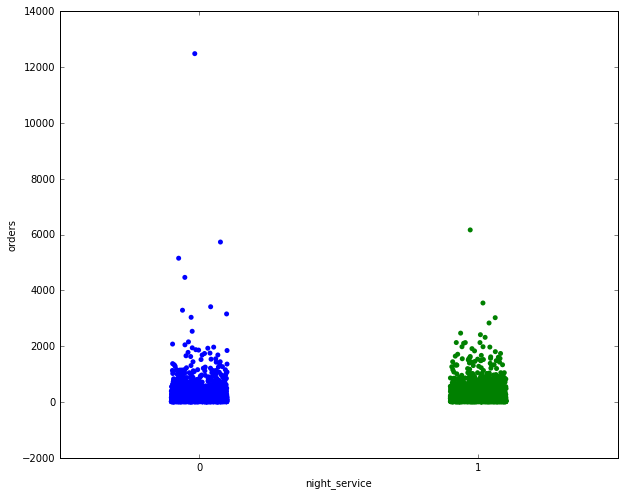

In [0]:
plt.figure(figsize=(10,8))
sns.stripplot(df["night_service"], df['orders'], jitter=True)
plt.show()

 Not much effect for having night services...even restaurants not having night services are performing a little better than the
 ones providing night services.


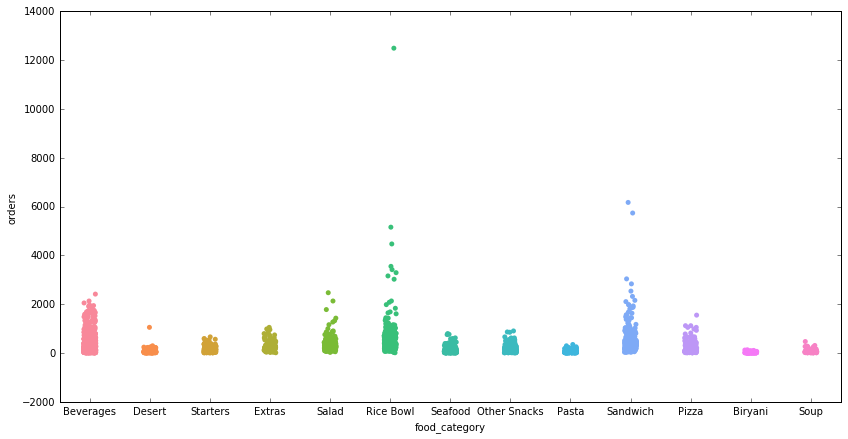

In [0]:
plt.figure(figsize=(14,7))
sns.stripplot(df["food_category"], df['orders'], jitter=True) ### Distribution of values

Beverages, Rice_Bowls, Sandwiches and Salad are the most ordered food categories---- a must have
Biryani, soup, pasta and Desert are lowest....can be compromised on

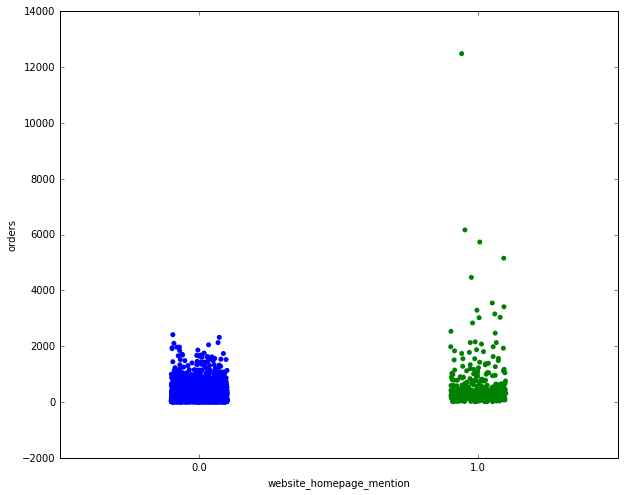

In [0]:
plt.figure(figsize=(10,8))
sns.stripplot(df['website_homepage_mention'], df['orders'], jitter=True) # website_homepage_mention=1 having larger orders
plt.show()

### Correlation Plot

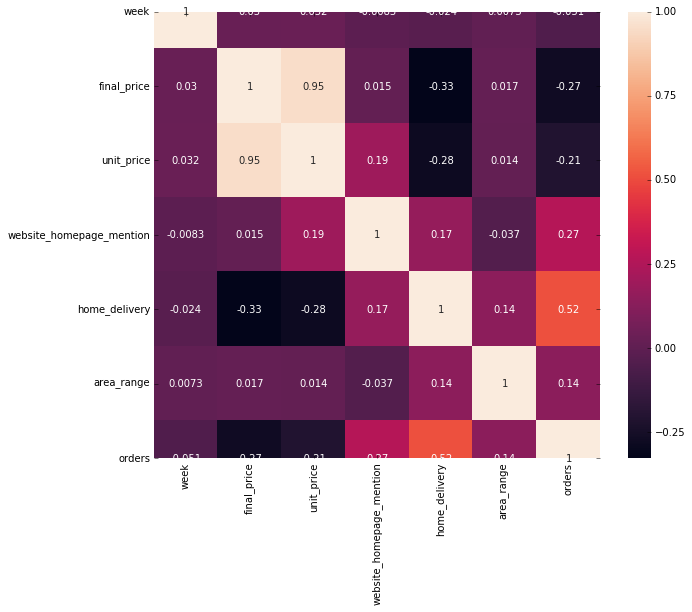

In [0]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Unit_Price and Final_price are highly correlated. One of them have to be dropped

In [0]:
# Dropping Unit_price 
df.drop(['unit_price'], axis = 1,inplace=True)

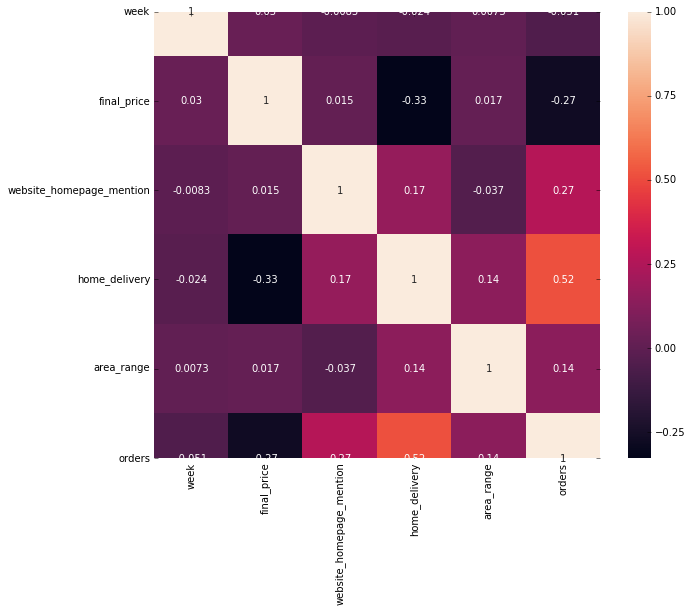

In [0]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

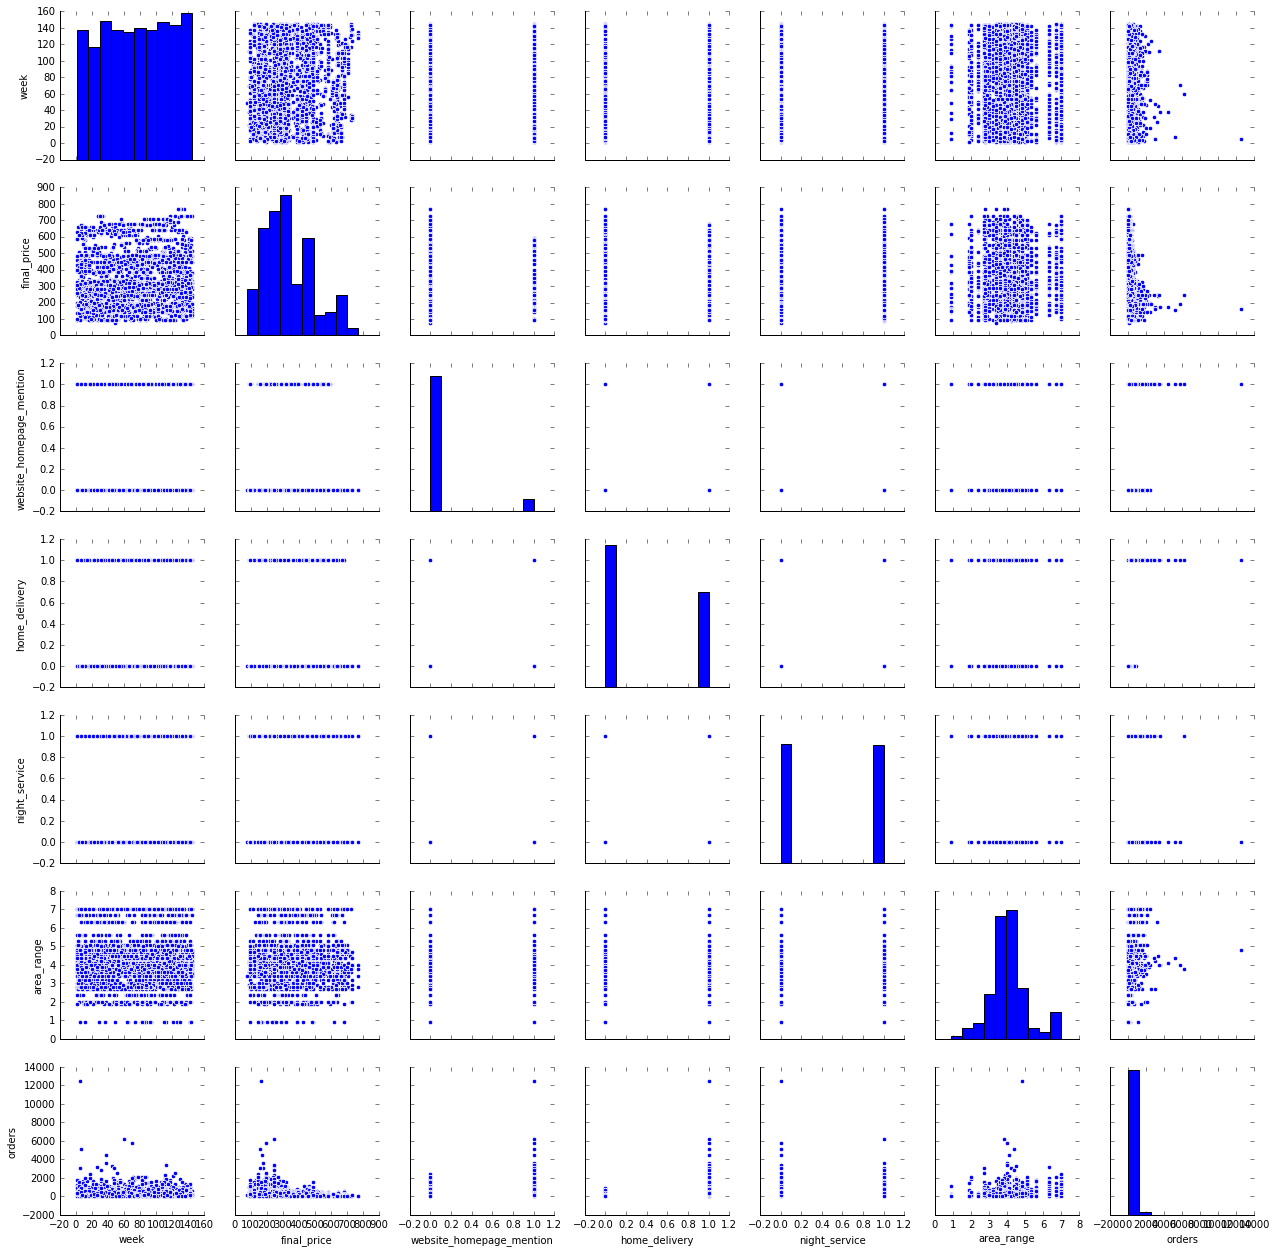

In [0]:
sns.pairplot(df)

#### None of the continuous variable shows a significant relationship with the target variable. The same needs to be checked in the final model.

In [0]:
#### get_dummies of the object variables

In [0]:
df =pd.get_dummies(df, columns=cat,drop_first=True)

In [0]:
df.head()

,week,final_price,area_range,orders,website_homepage_mention_1.0,food_category_Biryani,food_category_Desert,food_category_Extras,food_category_Other Snacks,food_category_Pasta,...,food_category_Sandwich,food_category_Seafood,food_category_Soup,food_category_Starters,cuisine_Indian,cuisine_Italian,center_type_Gurgaon,center_type_Noida,home_delivery_1.0,night_service_1
0,122.0,150.35,7.0,972,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,95.0,484.03,5.6,150,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,52.0,281.33,3.0,55,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
3,10.0,167.81,4.0,256,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
4,122.0,212.46,3.4,82,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### Outlier Checks

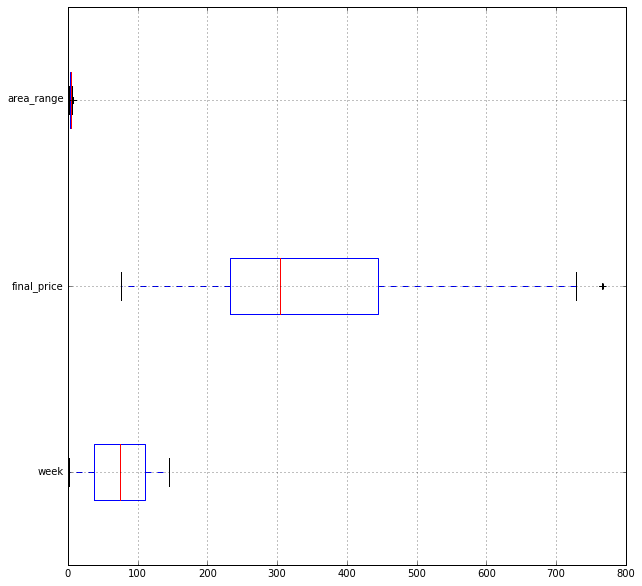

In [0]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.iloc[:,:3].boxplot(vert=0)

Order as a target variable is not considered to check the outliers. We will do a log conversion of the target variable to take care of the skewness and to ensure that order magnitude is matched with the scaled dataset


In [0]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [0]:
for column in df.iloc[:, 1:3].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

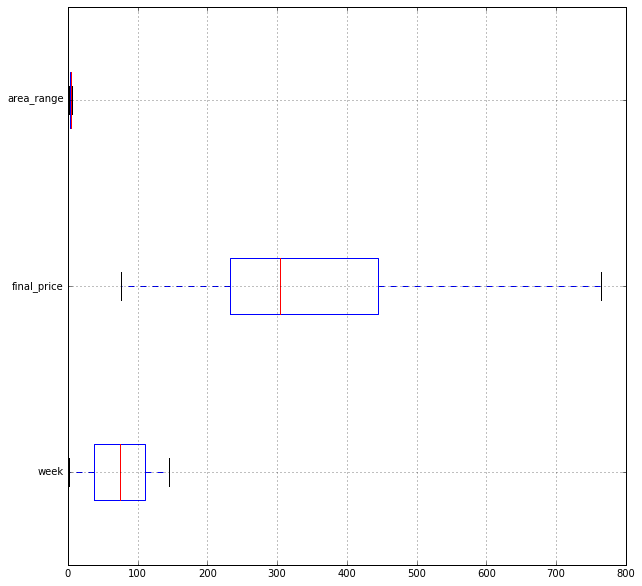

In [0]:
plt.figure(figsize=(10,10))
df.iloc[:, 0:3].boxplot(vert=0)

### Scaling the variables as continuous variables have different weightage

In [0]:
#Scales the data. Essentially returns the z-scores of every attribute

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
df['week'] = std_scale.fit_transform(df[['week']])
df['final_price'] = std_scale.fit_transform(df[['final_price']])
df['area_range'] = std_scale.fit_transform(df[['area_range']])

### Train-Test Split

In [0]:
df.columns

Index(['week', 'final_price', 'area_range', 'orders',
       'website_homepage_mention_1.0', 'food_category_Biryani',
       'food_category_Desert', 'food_category_Extras',
       'food_category_Other Snacks', 'food_category_Pasta',
       'food_category_Pizza', 'food_category_Rice Bowl', 'food_category_Salad',
       'food_category_Sandwich', 'food_category_Seafood', 'food_category_Soup',
       'food_category_Starters', 'cuisine_Indian', 'cuisine_Italian',
       'center_type_Gurgaon', 'center_type_Noida', 'home_delivery_1.0',
       'night_service_1'],
      dtype='object')

In [0]:
# Copy all the predictor variables into X dataframe
X = df.drop('orders', axis=1)

# Copy target into the y dataframe. Target variable is converted in to Log. 
y = np.log(df[['orders']])

In [0]:
X.head()

,week,final_price,area_range,website_homepage_mention_1.0,food_category_Biryani,food_category_Desert,food_category_Extras,food_category_Other Snacks,food_category_Pasta,food_category_Pizza,...,food_category_Sandwich,food_category_Seafood,food_category_Soup,food_category_Starters,cuisine_Indian,cuisine_Italian,center_type_Gurgaon,center_type_Noida,home_delivery_1.0,night_service_1
0,1.129633,-1.214395,2.043149,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0.485767,0.975142,1.759566,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,-0.539649,-0.354932,-1.189704,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
3,-1.541219,-1.099827,-0.055370,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1.129633,-0.806843,-0.735970,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [0]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regression Model

In [0]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for week is -0.0041068045722690814
The coefficient for final_price is -0.40354286519747384
The coefficient for area_range is 0.16906454326841025
The coefficient for website_homepage_mention_1.0 is 0.44689072858872664
The coefficient for food_category_Biryani is -0.10369818094671146
The coefficient for food_category_Desert is 0.5722054451619581
The coefficient for food_category_Extras is -0.22769824296095417
The coefficient for food_category_Other Snacks is -0.44682163212660775
The coefficient for food_category_Pasta is -0.7352610382529601
The coefficient for food_category_Pizza is 0.499963614474803
The coefficient for food_category_Rice Bowl is 1.640603292571774
The coefficient for food_category_Salad is 0.22723622749570868
The coefficient for food_category_Sandwich is 0.3733070983152591
The coefficient for food_category_Seafood is -0.07845778484039663
The coefficient for food_category_Soup is -1.0586633401722432
The coefficient for food_category_Starters is -0.37822394

In [0]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4.65801728440014


In [0]:
regression_model.coef_

array([[-0.0041068 , -0.40354287,  0.16906454,  0.44689073, -0.10369818,
         0.57220545, -0.22769824, -0.44682163, -0.73526104,  0.49996361,
         1.64060329,  0.22723623,  0.3733071 , -0.07845778, -1.05866334,
        -0.37822395, -1.13358226, -0.03927567, -0.16528109,  0.05014747,
         1.02640046,  0.00383989]])

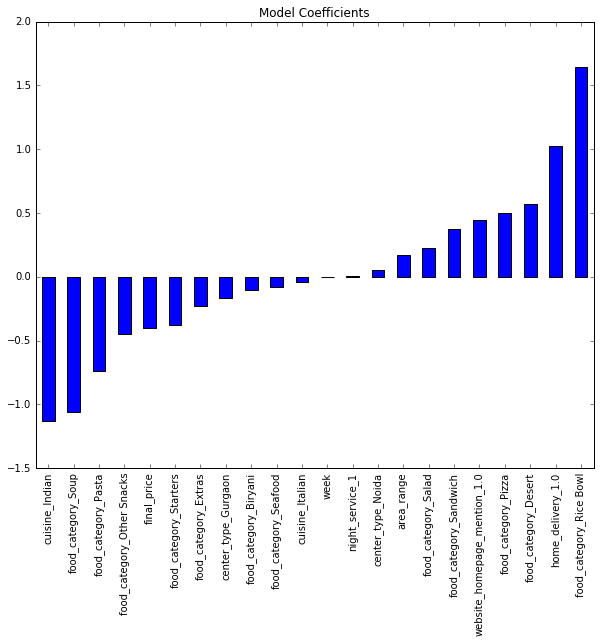

In [0]:
#checking the magnitude of coefficients
from pandas import Series, DataFrame
predictors = X_train.columns

coef = Series(regression_model.coef_.flatten(), predictors).sort_values()
plt.figure(figsize=(10,8))

coef.plot(kind='bar', title='Model Coefficients')
plt.show()

In [0]:
predictors

Index(['week', 'final_price', 'area_range', 'website_homepage_mention_1.0',
       'food_category_Biryani', 'food_category_Desert', 'food_category_Extras',
       'food_category_Other Snacks', 'food_category_Pasta',
       'food_category_Pizza', 'food_category_Rice Bowl', 'food_category_Salad',
       'food_category_Sandwich', 'food_category_Seafood', 'food_category_Soup',
       'food_category_Starters', 'cuisine_Indian', 'cuisine_Italian',
       'center_type_Gurgaon', 'center_type_Noida', 'home_delivery_1.0',
       'night_service_1'],
      dtype='object')

**Variables showing Positive effect** on regression model are food_category_Rice Bowl, home_delivery_1.0, food_category_Desert,food_category_Pizza ,website_homepage_mention_1.0, food_category_Sandwich, food_category_Salad and area_range - these factors highly influencing our model. 

Higher the value of beta coefficient, higher is the impact.

Dishes like Rice Bowl, Pizza, Desert with a facility like home delivery and website_homepage_mention plays an important role in demand or number of orders being placed in high frequency.

**Variables showing negative effect** on regression model for predicting restuarant orders: cuisine_Indian,food_category_Soup ,  food_category_Pasta , food_category_Other_Snacks.

final_price has a negative effect on the order - as expected.

Dishes like Soup, Pasta, other_snacks, Indian food category have negative effect on model prediction on number of orders being placed at restuarant, keeping all other predictors constant.

**Some variables which are hardly effecting** on model prediction for order frequency are:week and night_service.

Through the model we are able to see object type of variables or categorical variables are more significant than continuous variables.




In [0]:
# R square on training data
regression_model.score(X_train, y_train)

0.7504660770517294

In [0]:
# R square on testing data
regression_model.score(X_test, y_test)

0.7381986911258878

Rsquare for train data is 75.04% 
Rsquare for test data is 73.81%

Our model looks good with Rsquare approximately reaching 73-74%. It means our model can explain the variability shown by dependent variable 'Orders' to an extend of 73-74% and it still not able to explain the remaining ~26%. That means more varibles are required.

Difference between the train and test performance parameter is within +/- 10% , hence our model is valid.


# Linear Regression using statsmodels

This should be an optional step, it's shown here just for the sack of explaining or describing the power of linear regression model

In [0]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,week,final_price,area_range,website_homepage_mention_1.0,food_category_Biryani,food_category_Desert,food_category_Extras,food_category_Other Snacks,food_category_Pasta,food_category_Pizza,...,food_category_Seafood,food_category_Soup,food_category_Starters,cuisine_Indian,cuisine_Italian,center_type_Gurgaon,center_type_Noida,home_delivery_1.0,night_service_1,orders
2487,0.318839,-0.138328,1.078965,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,6.452049
1336,1.225021,2.311779,1.192398,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,4.219508
440,1.582724,1.516556,-0.168803,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,4.382027
41,1.368102,1.904817,-0.055370,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,5.549076
2433,-0.658884,0.860967,0.852098,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3.295837


In [0]:
data_train.columns

Index(['week', 'final_price', 'area_range', 'website_homepage_mention_1.0',
       'food_category_Biryani', 'food_category_Desert', 'food_category_Extras',
       'food_category_Other Snacks', 'food_category_Pasta',
       'food_category_Pizza', 'food_category_Rice Bowl', 'food_category_Salad',
       'food_category_Sandwich', 'food_category_Seafood', 'food_category_Soup',
       'food_category_Starters', 'cuisine_Indian', 'cuisine_Italian',
       'center_type_Gurgaon', 'center_type_Noida', 'home_delivery_1.0',
       'night_service_1', 'orders'],
      dtype='object')

In [0]:
# Renaming columns for simplicity
data_train.rename(columns = {"food_category_Rice Bowl": "food_category_Rice_Bowl","food_category_Other Snacks": "food_category_Other_Snacks","home_delivery_1.0":"home_delivery_1","website_homepage_mention_1.0":"website_homepage_mention_1"}, inplace = True) 

In [0]:
data_train.columns

Index(['week', 'final_price', 'area_range', 'website_homepage_mention_1',
       'food_category_Biryani', 'food_category_Desert', 'food_category_Extras',
       'food_category_Other_Snacks', 'food_category_Pasta',
       'food_category_Pizza', 'food_category_Rice_Bowl', 'food_category_Salad',
       'food_category_Sandwich', 'food_category_Seafood', 'food_category_Soup',
       'food_category_Starters', 'cuisine_Indian', 'cuisine_Italian',
       'center_type_Gurgaon', 'center_type_Noida', 'home_delivery_1',
       'night_service_1', 'orders'],
      dtype='object')

In [0]:
expr= 'orders ~ week+final_price+area_range+website_homepage_mention_1+food_category_Biryani+food_category_Desert+food_category_Extras+food_category_Other_Snacks+food_category_Pasta+food_category_Pizza+food_category_Rice_Bowl+food_category_Salad+food_category_Sandwich+food_category_Seafood+food_category_Soup+food_category_Starters+cuisine_Indian+cuisine_Italian+center_type_Gurgaon+center_type_Noida+home_delivery_1+night_service_1'

In [0]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                     4.658017
week                         -0.004107
final_price                  -0.403543
area_range                    0.169065
website_homepage_mention_1    0.446891
food_category_Biryani        -0.103698
food_category_Desert          0.572205
food_category_Extras         -0.227698
food_category_Other_Snacks   -0.446822
food_category_Pasta          -0.735261
food_category_Pizza           0.499964
food_category_Rice_Bowl       1.640603
food_category_Salad           0.227236
food_category_Sandwich        0.373307
food_category_Seafood        -0.078458
food_category_Soup           -1.058663
food_category_Starters       -0.378224
cuisine_Indian               -1.133582
cuisine_Italian              -0.039276
center_type_Gurgaon          -0.165281
center_type_Noida             0.050147
home_delivery_1               1.026400
night_service_1               0.003840
dtype: float64

In [0]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 orders   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     407.0
Date:                Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:54:38   Log-Likelihood:                -2741.9
No. Observations:                3000   AIC:                             5530.
Df Residuals:                    2977   BIC:                             5668.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

The overall P value is less than alpha, so rejecting H0 and accepting Ha for the regression , considering that atleast 1 regression co-efficient is not 0

In [0]:
# Calculate MSE
mse_train = np.mean((regression_model.predict(X_train)-y_train)**2)
mse_train

orders    0.364243
dtype: float64

In [0]:
# Calculate MSE
mse_test = np.mean((regression_model.predict(X_test)-y_test)**2)
mse_test

orders    0.393218
dtype: float64

Error calculations for Train and test data
Mean square error for train data is 36% and for test data is 39%. 
The mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value



In [0]:
# Prediction on Test data
y_pred = regression_model.predict(X_test)

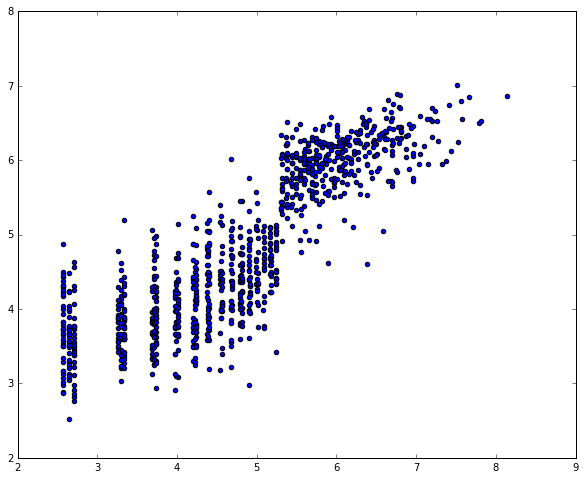

In [0]:
plt.figure(figsize=(10,8))
plt.scatter(y_test['orders'], y_pred)
plt.show()

In [0]:
lm1.params

Intercept                     4.658017
week                         -0.004107
final_price                  -0.403543
area_range                    0.169065
website_homepage_mention_1    0.446891
food_category_Biryani        -0.103698
food_category_Desert          0.572205
food_category_Extras         -0.227698
food_category_Other_Snacks   -0.446822
food_category_Pasta          -0.735261
food_category_Pizza           0.499964
food_category_Rice_Bowl       1.640603
food_category_Salad           0.227236
food_category_Sandwich        0.373307
food_category_Seafood        -0.078458
food_category_Soup           -1.058663
food_category_Starters       -0.378224
cuisine_Indian               -1.133582
cuisine_Italian              -0.039276
center_type_Gurgaon          -0.165281
center_type_Noida             0.050147
home_delivery_1               1.026400
night_service_1               0.003840
dtype: float64

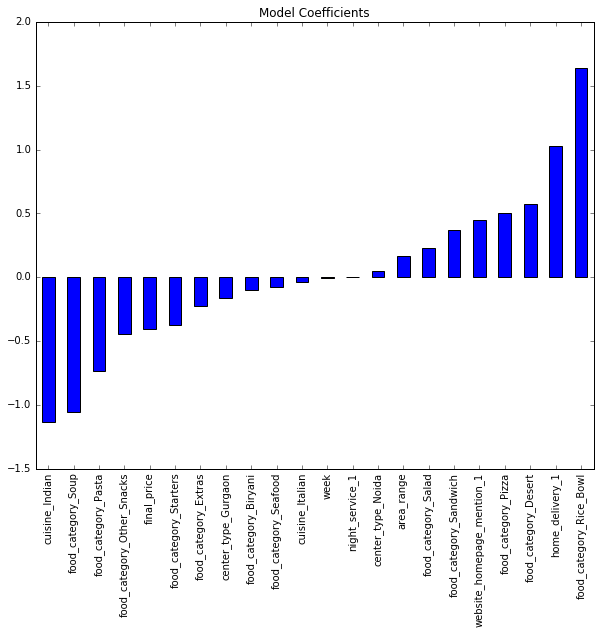

In [0]:
#checking the magnitude of coefficients
from pandas import Series, DataFrame
predictors = data_train.drop("orders",axis=1).columns

coef = Series((lm1.params), predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

# **Regularization**

**how can we overcome Overfitting of a regression model?**
Basically there are two methods to overcome overfitting,

* Reduce the model complexity
* Regularization

Let's work on Regularization method to check for overfitting problem. If our linear model is overfitting it will be fixed using Regularization.

**Regularization**
In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients j. How does reducing the coefficients will help us?

It is basically reducing the disparaity of some variables highly influencing the model by minimize the cost function, such that values predicted are much closer to the desired result 

**Ridge Regression**

Let us first implement it on our above problem and check our results that whether it performs better than our linear regression model.

the cost function for ridge regression
 
 Min(||Y - X(theta)||^2 +  λ||theta||^2)
 
Lambda is the penalty term. λ given here, is actually denoted by alpha parameter in the ridge function. So by changing the values of alpha, we are basically controlling the penalty term. Higher the values of alpha, bigger is the penalty and therefore the magnitude of coefficients are reduced.

* It shrinks the parameters, therefore it is mostly used to prevent multicollinearity
* It reduces the model complexity by coefficient shrinkage
* It uses L2 regularization technique


1. Value of alpha, which is hyperparameter of Ridge, which means that they are not automatically learned by the model instead they have to be set manually. We run a grid search for otimum alpha values
2. To find optimum alpha for Ridge Regularization we are applying GridSearchCV

In [0]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [0]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-0.3751867421112124


Negative sign is because of the known error in Grid Search Cross Validation library, so ignore the negative sign

https://stackoverflow.com/questions/48244219/is-sklearn-metrics-mean-squared-error-the-larger-the-better-negated



In [0]:
## Alternatively you can calculate a score using the following command as well
ridge_regressor.score(X ,y)

-0.37084235948337163

In [0]:
from sklearn.linear_model import Ridge
from pandas import Series, DataFrame

## training the model

ridgeReg = Ridge(alpha=0.01, normalize=True)

ridgeReg.fit(X_train,y_train)




Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [0]:
ridgeReg.coef_.flatten()

array([-0.00422047, -0.35965757,  0.16626317,  0.46862776, -0.21879348,
        0.45140317, -0.22033895, -0.4629183 , -0.78656531,  0.44485682,
        1.54148571,  0.19337433,  0.33853965, -0.12440234, -1.05447545,
       -0.40009456, -1.01760069,  0.03118954, -0.16641975,  0.05073381,
        1.02909102,  0.00304897])

In [0]:
## Calculation Score and MSE on the train data set

In [0]:
ridgeReg.score(X_train,y_train)

0.7501430196283502

In [0]:
pred = ridgeReg.predict(X_train)
pred.shape
pred = pred.reshape(3000,1)
mse_train = np.mean((pred - y_train)**2)

mse_train

orders    0.364715
dtype: float64

In [0]:
## Calculation Score and MSE on the test data set

In [0]:
ridgeReg.score(X_test,y_test)

0.7388622635487119

In [0]:
#calculating mse
pred_test = ridgeReg.predict(X_test)
pred_test.shape
pred_test = pred_test.reshape(1000,1)
mse_test = np.mean((pred_test - y_test)**2)

mse_test 

orders    0.392221
dtype: float64

In [0]:
ridgeReg.coef_

array([[-0.00422047, -0.35965757,  0.16626317,  0.46862776, -0.21879348,
         0.45140317, -0.22033895, -0.4629183 , -0.78656531,  0.44485682,
         1.54148571,  0.19337433,  0.33853965, -0.12440234, -1.05447545,
        -0.40009456, -1.01760069,  0.03118954, -0.16641975,  0.05073381,
         1.02909102,  0.00304897]])

In [0]:
predictors

Index(['week', 'final_price', 'area_range', 'website_homepage_mention_1',
       'food_category_Biryani', 'food_category_Desert', 'food_category_Extras',
       'food_category_Other_Snacks', 'food_category_Pasta',
       'food_category_Pizza', 'food_category_Rice_Bowl', 'food_category_Salad',
       'food_category_Sandwich', 'food_category_Seafood', 'food_category_Soup',
       'food_category_Starters', 'cuisine_Indian', 'cuisine_Italian',
       'center_type_Gurgaon', 'center_type_Noida', 'home_delivery_1',
       'night_service_1'],
      dtype='object')

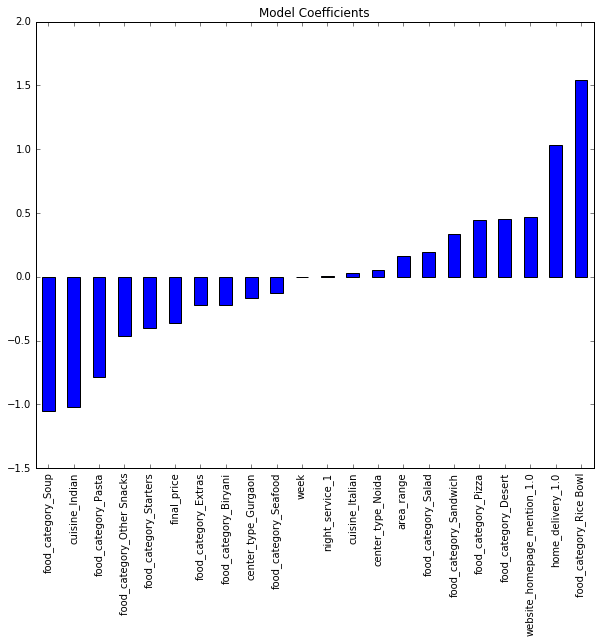

In [0]:
predictors = X_train.columns

coef = Series(ridgeReg.coef_.flatten(),predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

## In terms of feature significance and sign of beta coefficients , results are same as multiple linear regression.

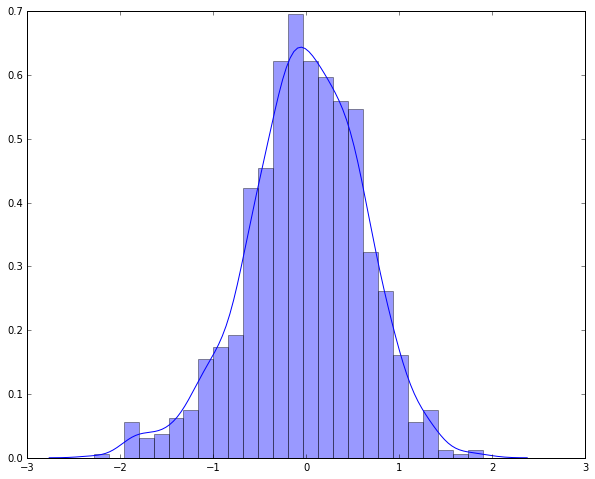

In [0]:
## Plotting the error between the test value and predicted value
plt.figure(figsize=(10,8))
sns.distplot(y_test-pred_test)
plt.show()

**Lasso regression**

LASSO (Least Absolute Shrinkage Selector Operator), is quite similar to ridge
lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

Mathematics behind lasso regression is quiet similar to that of ridge only difference being instead of adding squares of theta, we will add absolute value of Θ.

the cost function for lasso regression
 
 Min(||Y - X(theta)||^2 +  λ||theta||)
 
 λ is the hypermeter, whose value is equal to the alpha in the Lasso function
 
* It uses L1 regularization technique (will be discussed later in this article)
* It is generally used when we have more number of features, because it automatically does feature selection.

In [0]:
#Optimizing for alpha
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [0]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-0.37518707613270585


In [0]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=1e-8, normalize=True)

lassoReg.fit(X_train,y_train)

pred1 = lassoReg.predict(X_test)

In [0]:
## Calculation Score and MSE on the train data set

In [0]:
lassoReg.score(X_train,y_train)

0.7504660770381086

In [0]:
pred =lassoReg.predict(X_train)
pred.shape
pred = pred.reshape(3000,1)
mse_train = np.mean((pred - y_train)**2)

mse_train

orders    0.364243
dtype: float64

In [0]:
## Calculation Score and MSE on the test data set

In [0]:
lassoReg.score(X_test,y_test)

0.7381989572986922

In [0]:
pred_test=lassoReg.predict(X_test)
pred_test.shape
pred_test = pred_test.reshape(1000,1)
mse_test = np.mean((pred_test - y_test)**2)

mse_test

orders    0.393217
dtype: float64

In [0]:
lassoReg.coef_

array([-0.00410624, -0.40353481,  0.16906389,  0.44689342, -0.10371452,
        0.57218459, -0.22769463, -0.44682351, -0.73526936,  0.49995562,
        1.64058701,  0.22722719,  0.37329833, -0.07846099, -1.05866126,
       -0.37822678, -1.13355998, -0.03925933, -0.16528034,  0.05014627,
        1.02640267,  0.00383868])

In [0]:
predictors

Index(['week', 'final_price', 'area_range', 'website_homepage_mention_1.0',
       'food_category_Biryani', 'food_category_Desert', 'food_category_Extras',
       'food_category_Other Snacks', 'food_category_Pasta',
       'food_category_Pizza', 'food_category_Rice Bowl', 'food_category_Salad',
       'food_category_Sandwich', 'food_category_Seafood', 'food_category_Soup',
       'food_category_Starters', 'cuisine_Indian', 'cuisine_Italian',
       'center_type_Gurgaon', 'center_type_Noida', 'home_delivery_1.0',
       'night_service_1'],
      dtype='object')

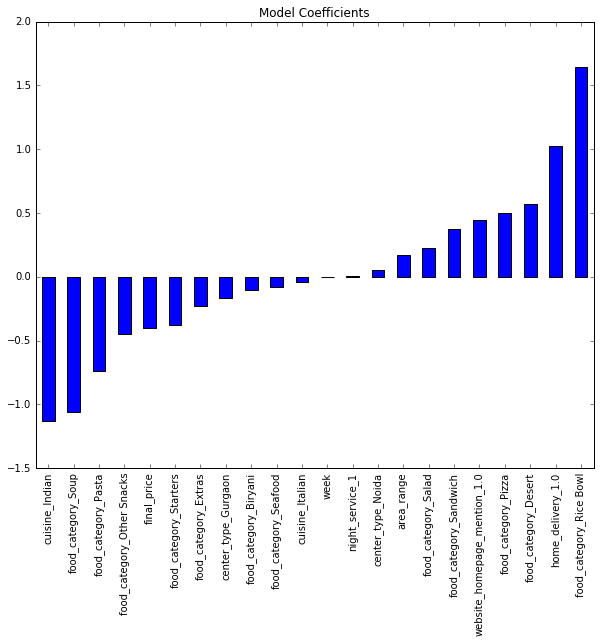

In [0]:
predictors = X_train.columns

coef = Series(lassoReg.coef_,predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

## In terms of feature significance and sign of beta coefficients , results are same as multiple linear regression.

In [0]:
# get Lasso coefficient and print them 
Lasso_coefficient = pd.DataFrame() 
Lasso_coefficient["Columns"]= X_train.columns 
Lasso_coefficient['Coefficient Estimate'] = pd.Series(lassoReg.coef_) 
print(Lasso_coefficient) 

                         Columns  Coefficient Estimate
0                           week             -0.004106
1                    final_price             -0.403535
2                     area_range              0.169064
3   website_homepage_mention_1.0              0.446893
4          food_category_Biryani             -0.103715
5           food_category_Desert              0.572185
6           food_category_Extras             -0.227695
7     food_category_Other Snacks             -0.446824
8            food_category_Pasta             -0.735269
9            food_category_Pizza              0.499956
10       food_category_Rice Bowl              1.640587
11           food_category_Salad              0.227227
12        food_category_Sandwich              0.373298
13         food_category_Seafood             -0.078461
14            food_category_Soup             -1.058661
15        food_category_Starters             -0.378227
16                cuisine_Indian             -1.133560
17        

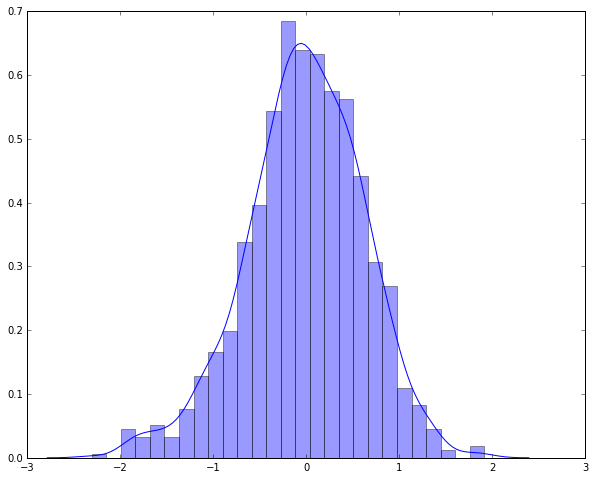

In [0]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.distplot(y_test-pred_test)
plt.show()

**Elastic Net Regression**

Elastic net is basically a combination of both L1 and L2 regularization. So if you know elastic net, you can implement both Ridge and Lasso by tuning the parameters. So it uses both L1 and L2 penality term, therefore its equation look like as follows:

min(||Y-Xtheta||^2 + Lambda1||theta|| + lambda2||theta||^2)

In [0]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
Elaticnet=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
Elaticnet_regressor=GridSearchCV(Elaticnet,parameters,scoring='neg_mean_squared_error',cv=5)

Elaticnet_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [0]:
print(Elaticnet_regressor.best_params_)
print(Elaticnet_regressor.best_score_)

{'alpha': 1e-08}
-0.37518707791289163


In [0]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1e-08, l1_ratio=0.5, normalize=False)

ENreg.fit(X_train,y_train)



ElasticNet(alpha=1e-08, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
## Calculation Score and MSE on the train data set

In [0]:
ENreg.score(X_train,y_train)

0.7504660770517012

In [0]:
pred =ENreg.predict(X_train)
pred.shape
pred = pred.reshape(3000,1)
mse_train = np.mean((pred - y_train)**2)

mse_train

orders    0.364243
dtype: float64

In [0]:
## Calculation Score and MSE on the test data set

In [0]:
ENreg.score(X_test,y_test)

0.738198704216112

In [0]:
pred_test =ENreg.predict(X_test)
pred_test.shape
pred_test = pred_test.reshape(1000,1)
mse_test = np.mean((pred_test - y_test)**2)

mse_test

orders    0.393218
dtype: float64

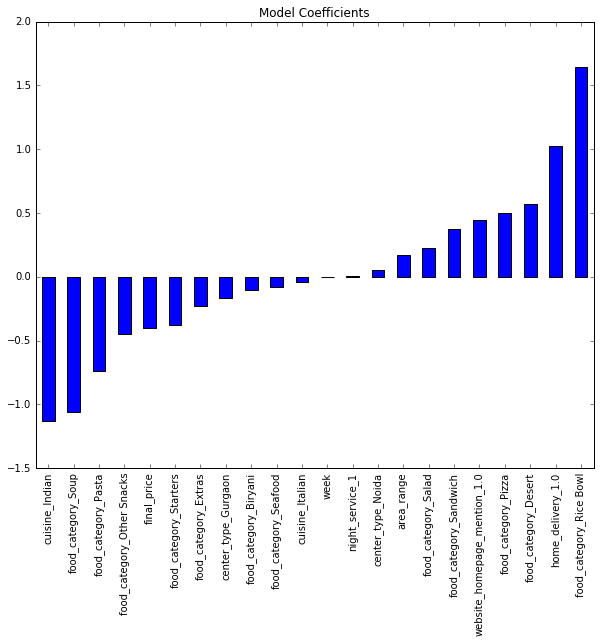

In [0]:
predictors = X_train.columns

coef = Series(ENreg.coef_,predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

## In terms of feature significance and sign of beta coefficients , results are same as multiple linear regression.

In [0]:
# get ElasticNet coefficient and print them 
Elasticnet_coefficient = pd.DataFrame() 
Elasticnet_coefficient["Columns"]= X_train.columns 
Elasticnet_coefficient['Coefficient Estimate'] = pd.Series(ENreg.coef_) 
print(Elasticnet_coefficient)

                         Columns  Coefficient Estimate
0                           week             -0.004107
1                    final_price             -0.403543
2                     area_range              0.169065
3   website_homepage_mention_1.0              0.446891
4          food_category_Biryani             -0.103699
5           food_category_Desert              0.572205
6           food_category_Extras             -0.227698
7     food_category_Other Snacks             -0.446821
8            food_category_Pasta             -0.735261
9            food_category_Pizza              0.499963
10       food_category_Rice Bowl              1.640602
11           food_category_Salad              0.227236
12        food_category_Sandwich              0.373307
13         food_category_Seafood             -0.078458
14            food_category_Soup             -1.058663
15        food_category_Starters             -0.378224
16                cuisine_Indian             -1.133581
17        

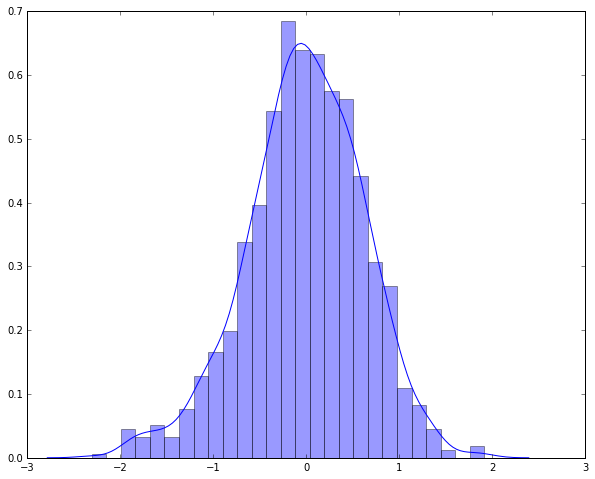

In [0]:
plt.figure(figsize=(10,8))
sns.distplot(y_test-pred_test)
plt.show()

## Comparison of Different Models

In [0]:
# R square on training data
print("lm train score:",regression_model.score(X_train, y_train))
print("ridge train score:",ridgeReg.score(X_train,y_train))
print("lasso train score:", lassoReg.score(X_train,y_train))
print("Elasticnet train score:", ENreg.score(X_train,y_train))


lm train score: 0.7504660770517294
ridge train score: 0.7501430196283502
lasso train score: 0.7504660770381086
Elasticnet train score: 0.7504660770517012


RSquare: This statistic measures how successful the fit is in explaining the variation of the data. Put another way, R-square is the square of the correlation between the response values and the predicted response values. It is also called the square of the multiple correlation coefficient and the coefficient of multiple determination.

R-square can take on any value between 0 and 1, with a value closer to 1 indicating that a greater proportion of variance is accounted for by the model.


On comparison, Linear Regression, Lasso and ElasticNet are almost same Rsquare values.

Interpretation:

Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

If regularization worked on linear regression shows this linear model was overfitting.

Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.



In [0]:
# R square on test data
print("lm test score:",regression_model.score(X_test, y_test))
print("ridge test score:",ridgeReg.score(X_test, y_test))
print("lasso test score:", lassoReg.score(X_test, y_test))
print("Elasticnet test score:", ENreg.score(X_test,y_test))

lm test score: 0.7381986911258878
ridge test score: 0.7388622635487119
lasso test score: 0.7381989572986922
Elasticnet test score: 0.738198704216112


Rsquare for test data shows same trend. 

In [0]:
from sklearn.metrics import mean_squared_error
print("lm MSE:",mean_squared_error(y_test, regression_model.predict(X_test)))
print("ridge MSE:", mean_squared_error(y_test, ridge_regressor.predict(X_test)))
print("lasso MSE:", mean_squared_error(y_test, lassoReg.predict(X_test)))
print("elasticnet MSE:", mean_squared_error(y_test, ENreg.predict(X_test)))

lm MSE: 0.39321763586459574
ridge MSE: 0.38870379739008887
lasso MSE: 0.39321723608110587
elasticnet MSE: 0.3932176162034755


All models are showing very similar error when compared.Lowest is for ridge

# Out of four models:

1. Linear Regression, Lasso,Ridge and ElasticNet Regularization have performed almost equally.
3. When Mean squared error is checked all four models worked very similar to each other



## Conclusion

Taking in to account the final outcome of linear regression

Intercept                      4.6580      0.043    107.823      0.000       4.573       4.743
week                          -0.0041      0.011     -0.371      0.711      -0.026       0.018
final_price                   -0.4035      0.031    -13.146      0.000      -0.464      -0.343
area_range                     0.1691      0.013     13.163      0.000       0.144       0.194
website_homepage_mention_1     0.4469      0.046      9.753      0.000       0.357       0.537
food_category_Biryani         -0.1037      0.083     -1.256      0.209      -0.266       0.058
food_category_Desert           0.5722      0.078      7.370      0.000       0.420       0.724
food_category_Extras          -0.2277      0.074     -3.061      0.002      -0.374      -0.082
food_category_Other_Snacks    -0.4468      0.057     -7.797      0.000      -0.559      -0.334
food_category_Pasta           -0.7353      0.074     -9.950      0.000      -0.880      -0.590
food_category_Pizza            0.5000      0.077      6.480      0.000       0.349       0.651
food_category_Rice_Bowl        1.6406      0.070     23.399      0.000       1.503       1.778
food_category_Salad            0.2272      0.060      3.792      0.000       0.110       0.345
food_category_Sandwich         0.3733      0.058      6.386      0.000       0.259       0.488
food_category_Seafood         -0.0785      0.074     -1.067      0.286      -0.223       0.066
food_category_Soup            -1.0587      0.077    -13.776      0.000      -1.209      -0.908
food_category_Starters        -0.3782      0.058     -6.540      0.000      -0.492      -0.265
cuisine_Indian                -1.1336      0.068    -16.669      0.000      -1.267      -1.000
cuisine_Italian               -0.0393      0.064     -0.611      0.542      -0.165       0.087
center_type_Gurgaon           -0.1653      0.030     -5.519      0.000      -0.224      -0.107
center_type_Noida              0.0501      0.030      1.692      0.091      -0.008       0.108
home_delivery_1                1.0264      0.030     34.428      0.000       0.968       1.085
night_service_1                0.0038      0.022      0.173      0.863      -0.040       0.047

The final Linear Regression equation with only significant variables is 
  
Orders = 4.65 + 1.02*home_delivery_1.0 + .46* website_homepage_mention_1 0+ (-.40* final_price) +.17*area_range +  0.57*food_category_Desert + (-0.22*food_category_Extras) + (-0.73*food_category_Pasta) + 0.49*food_category_Pizza + 1.6*food_category_Rice_Bowl + 0.22*food_category_Salad + 0.37*food_category_Sandwich + (-1.05*food_category_Soup) + (-0.37*food_category_Starters) + (-1.13*cuisine_Indian) + (-0.16*center_type_Gurgaon) +

**Notice: below interpretation are on Log Of orders. For real Values apply anti-log(np.exp())
  
When Order  is for rice bowl , orders increases by 1.6 units, keeping all other predictors constant.  
similarly, when it is home delivery , orders increases by 1.08 units, keeping all other predictors constant.
When order is made for Extras, order reduces by .22, keeping all other predictors constant.
 
Top 5 variables influencing regression model are:
1. food_category_Rice Bowl
2. home_delivery_1.0
3. food_category_Pizza
4. food_category_Desert
5. website_homepage_mention_1
  
Higher the beta coefficient , more significant is that predictor 